# Курсовая работа


## Выполнил студент группы БФИ2202 Романчук Михаил Александрович

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

Необходимо:

    1. Рассчитать общую выручку магазина.
    2. Найти товар, который был продан наибольшее количество раз.
    3. Найти товар, который принес наибольшую выручку.
    4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке. Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск. Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTable:
    def __init__(self):
        self.capacity = 10 # начальная емкость таблицы
        self.size = 0 # количество элементов в таблице
        self.buckets = [None] * self.capacity # создаем пустые списки для каждой ячейки таблицы
  
    def add(self, key, value):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ уже есть в таблице, обновляем значение
                node.value += int(value)
                return node.value
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()
  
    def get(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None
  
    def remove(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        prev = None
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    def resize(self):
        new_capacity = self.capacity * 2 # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

In [3]:
def merge_sort(nums): 
    if len(nums) > 1: 
        mid = len(nums)//2
        left = nums[:mid] 
        right = nums[mid:]
        merge_sort(left) 
        merge_sort(right) 
        i = j = k = 0
        while i < len(left) and j < len(right): 
            if left[i] < right[j]: 
                nums[k] = left[i] 
                i+=1
            else: 
                nums[k] = right[j] 
                j+=1
            k+=1
        while i < len(left): 
            nums[k] = left[i] 
            i+=1
            k+=1
        while j < len(right): 
            nums[k] = right[j] 
            j+=1
            k+=1

In [4]:
def count(file_name):
    earn = HashTable()
    sale = HashTable()

    revenue = 0
    most_sold = ''
    max_revenue = ''
    most_sold_count = 0
    revenue_arr = []

    next(file_name)

    for i in file_name:
        if i[6].isdecimal() and i[4].isdecimal():
            revenue += int(i[6])
            if most_sold_count < int(i[4]):
                most_sold_count = int(i[4])
                most_sold = i[2]
            revenue_arr.append(int(i[6]))
            sale.add(str(i[6]), i[2])
            earn.add(str(i[2]), i[4])
            earn.add(str(i[2]) + "1", i[6])
            revenue_sorted = list(revenue_arr)
            merge_sort(revenue_sorted)
            max_revenue = sale.get(str(revenue_sorted[-1]))
    return revenue, most_sold, max_revenue

In [5]:
try:
    with open("kurs.csv", encoding='utf-8') as file_name:
        
        csv_file = csv.reader(file_name, delimiter=";")
        revenue, max_sold_product, max_revenue_product = count(csv_file)
        
        print(f'Общая выручка магазина: {revenue} рублей')
        print(f'Самый популярный товар: {max_sold_product}')
        print(f'Самый прибыльный товар: {max_revenue_product}')
except:
    print("Файл не найден")


Общая выручка магазина: 241969500 рублей
Самый популярный товар: Philips Hue Smart Bulbs
Самый прибыльный товар: Apple iPhone 14


In [6]:
data = pd.read_csv('kurs.csv', sep=';')

data['Доля от общей выручки в %'] = data['Общая стоимость'] / (revenue / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2)

html = data[['Название товара', 'Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']].to_html(index=False)


html = html.replace('<table>', '<table style="background-color: white; border: 1px solid black;">')
html = html.replace('<th>', '<th style="background-color: lightgreen; border: 1px solid black; color: darkblue;">')
html = html.replace('<td>', '<td style="background-color: lightgreen; border: 1px solid black; color: darkblue;">')
html = html.replace('</tr>', '<tr style="border: 1px solid black;">')

from IPython.display import HTML
display(HTML(html))

Название товара,Количество продаж,Общая стоимость,Доля от общей выручки в %
Apple iPhone 14,500,44995000,18.60
Samsung Galaxy S22 Ultra,300,29997000,12.40
Игровые приставки,200,11998000,4.96
LG OLED TV,150,26998500,11.16
Apple MacBook Pro 16,100,19999000,8.27
Canon EOS R7,50,12499500,5.17
Bose QuietComfort 55,100,3499000,1.45
Samsung Galaxy Tab S8,75,5249250,2.17
DJI Mavic 3,25,3749750,1.55
Philips Hue Smart Bulbs,560,1495000,0.62


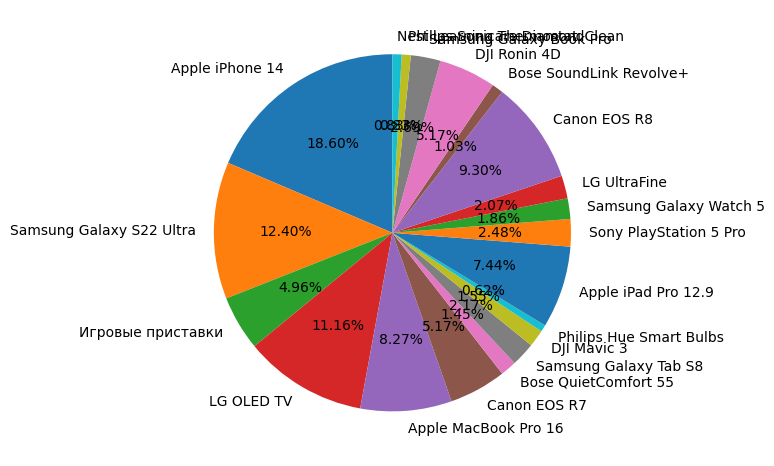

In [95]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct


with open("kurs.csv", encoding='utf-8') as file_name:
        
        csv_file = csv.reader(file_name, delimiter=";")
        next(csv_file)
        names = []
        revenue_arr = []

        for i in csv_file:
            names.append(i[2])
            revenue_arr.append(int(i[6]))

plt.subplots_adjust(bottom=0, top=0.93, left=-0.35, right=1)
wedges, texts, autotexts = plt.pie(revenue_arr,
                                autopct=make_autopct(revenue_arr),
                                labels=names,
                                startangle=90,
                                )

        
